导入工具包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pydotplus

In [2]:
# 设置中文字体
mpl.rcParams['font.sans-serif'] = ['simHei']
mpl.rcParams['axes.unicode_minus'] = False
# 设置鸢尾花特征
iris_feature_E='sepal length','sepal width','petal length','petal width'
iris_feature='花萼长度','花萼宽度','花瓣长度','花瓣宽度'
iris_class='Iris-setosa','Iris-versicolor','Iris-virginica'
# 设置数据文件路径并读取数据
path='iris.data'
data=pd.read_csv(path,header=None)
x=data[list(range(4))]
y=LabelEncoder().fit_transform(data[4])
# 为了可视化，仅使用前两列特征
x=x[[0,1]]
# 设置训练集和测试集
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
# 决策树参数估计
#min_sample_split=10：如果该结点包含的样本数目大于10，则（有可能）对其进行分支
#min_sample_leaf=10：若将某结点分支以后，得到的每个子结点样本数目均大于10，则完成分支，否则，不进行分支
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)
y_train_pred=model.predict(x_train)
print('训练集正确率: ',accuracy_score(y_train,y_train_pred))
y_test_hat=model.predict(x_test)#测试数据
print('测试集正确率: ',accuracy_score(y_test,y_test_hat))

训练集正确率:  0.9523809523809523
测试集正确率:  0.6222222222222222


[Text(0.42887931034482757, 0.9615384615384616, 'sepal length <= 5.45\nentropy = 1.582\nsamples = 105\nvalue = [36, 32, 37]\nclass = Iris-virginica'),
 Text(0.10344827586206896, 0.8846153846153846, 'sepal width <= 2.8\nentropy = 0.657\nsamples = 38\nvalue = [33, 4, 1]\nclass = Iris-setosa'),
 Text(0.06896551724137931, 0.8076923076923077, 'sepal length <= 4.7\nentropy = 1.252\nsamples = 6\nvalue = [1, 4, 1]\nclass = Iris-versicolor'),
 Text(0.034482758620689655, 0.7307692307692307, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = Iris-setosa'),
 Text(0.10344827586206896, 0.7307692307692307, 'sepal width <= 2.45\nentropy = 0.722\nsamples = 5\nvalue = [0, 4, 1]\nclass = Iris-versicolor'),
 Text(0.06896551724137931, 0.6538461538461539, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = Iris-versicolor'),
 Text(0.13793103448275862, 0.6538461538461539, 'sepal length <= 5.05\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]\nclass = Iris-versicolor'),
 Text(0.10344827586206896, 0.5769

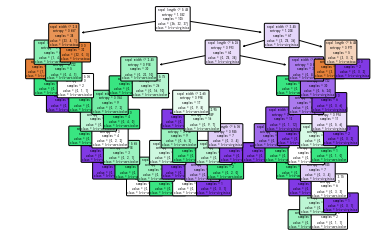

In [3]:
from sklearn import tree
# 用tree.plot_tree绘制决策树
tree.plot_tree(model,feature_names=iris_feature_E[0:2],class_names=iris_class,filled=True,rounded=True,fontsize=3)

In [4]:
# 画图
N,M=50,50# 设置横纵各采样多少个值
x1_min,x2_min=x.min()
x1_max,x2_max=x.max()
t1=np.linspace(x1_min,x1_max,N)
t2=np.linspace(x2_min,x2_max,M)
x1,x2=np.meshgrid(t1,t2)# 生成网格采样点
x_show=np.stack((x1.flat,x2.flat),axis=1)# 测试点
print(x_show.shape)
print('x_show = \n',x_show)

(2500, 2)
x_show = 
 [[4.3        2.        ]
 [4.37346939 2.        ]
 [4.44693878 2.        ]
 ...
 [7.75306122 4.4       ]
 [7.82653061 4.4       ]
 [7.9        4.4       ]]


In [5]:
# 设置绘图颜色
cm_light=mpl.colors.ListedColormap(['#A0FFA0','#FFA0A0','#A0A0FF'])
cm_dark=mpl.colors.ListedColormap(['g','r','b'])
y_show_hat=model.predict(x_show)# 预测值
print(y_show_hat.shape)
print(y_show_hat)

(2500,)
[0 0 0 ... 2 2 2]


In [6]:
y_show_hat=y_show_hat.reshape(x1.shape)# 使之与输入的形状相同
print(y_show_hat)

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


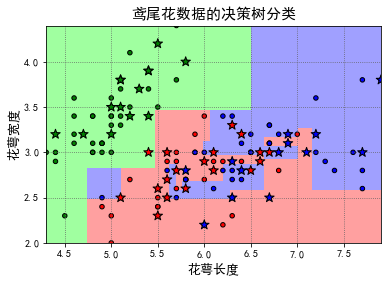

In [7]:
# 绘图
plt.figure(facecolor='w')
plt.pcolormesh(x1,x2,y_show_hat,cmap=cm_light)#预测值显示
plt.scatter(x_test[0],x_test[1],c=y_test.ravel(),edgecolor='k',s=100,zorder=10,cmap=cm_dark,marker='*')#测试数据
plt.scatter(x[0],x[1],c=y.ravel(),edgecolor='k',s=20,cmap=cm_dark)#全部数据
plt.xlabel(iris_feature[0],fontsize=13)
plt.ylabel(iris_feature[1],fontsize=13)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.grid(b=True,ls=':',color='#606060')
plt.title('鸢尾花数据的决策树分类',fontsize=15)
plt.show()

In [8]:
# 训练集上的预测结果 并输出预测准确度
y_test=y_test.reshape(-1)
print(y_test_hat)
print(y_test)
result=(y_test_hat==y_test)#True：预测正确，False：预测错误
acc=np.mean(result)
print('准确度：%.2f%%'%(100*acc))

[0 1 2 0 2 2 1 0 0 2 2 0 1 2 1 0 2 1 0 0 1 0 2 0 2 1 0 0 1 1 2 2 2 2 1 0 1
 0 2 1 2 0 1 1 1]
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]
准确度：62.22%


当决策树的深度为：1，测试集错误率为：44.44%
当决策树的深度为：2，测试集错误率为：40.00%
当决策树的深度为：3，测试集错误率为：20.00%
当决策树的深度为：4，测试集错误率为：24.44%
当决策树的深度为：5，测试集错误率为：24.44%
当决策树的深度为：6，测试集错误率为：26.67%
当决策树的深度为：7，测试集错误率为：37.78%
当决策树的深度为：8，测试集错误率为：40.00%
当决策树的深度为：9，测试集错误率为：35.56%
当决策树的深度为：10，测试集错误率为：40.00%
当决策树的深度为：11，测试集错误率为：37.78%
当决策树的深度为：12，测试集错误率为：40.00%
当决策树的深度为：13，测试集错误率为：37.78%
当决策树的深度为：14，测试集错误率为：37.78%


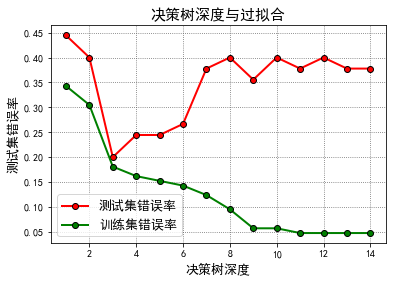

In [9]:
# 过拟合：错误率
depth=np.arange(1,15)
err_train_list=[]
err_test_list=[]
clf=DecisionTreeClassifier(criterion='entropy')
for d in depth:
    clf.set_params(max_depth=d)
    clf.fit(x_train,y_train)
    y_train_pred=clf.predict(x_train)
    err_train=1 - accuracy_score(y_train,y_train_pred)
    err_train_list.append(err_train)
    y_test_pred=clf.predict(x_test)
    err_test=1 - accuracy_score(y_test,y_test_pred)
    err_test_list.append(err_test)
    print('当决策树的深度为：%d，测试集错误率为：%.2f%%'%(d,100*err_test))
plt.figure(facecolor='w')
plt.plot(depth,err_test_list,'ro-',markeredgecolor='k',lw=2,label='测试集错误率')
plt.plot(depth,err_train_list,'go-',markeredgecolor='k',lw=2,label='训练集错误率')
plt.xlabel('决策树深度',fontsize=13)
plt.ylabel('测试集错误率',fontsize=13)
plt.legend(loc='lower left',fontsize=13)
plt.title('决策树深度与过拟合',fontsize=15)
plt.grid(b=True,ls=':',color='#606060')
plt.show()